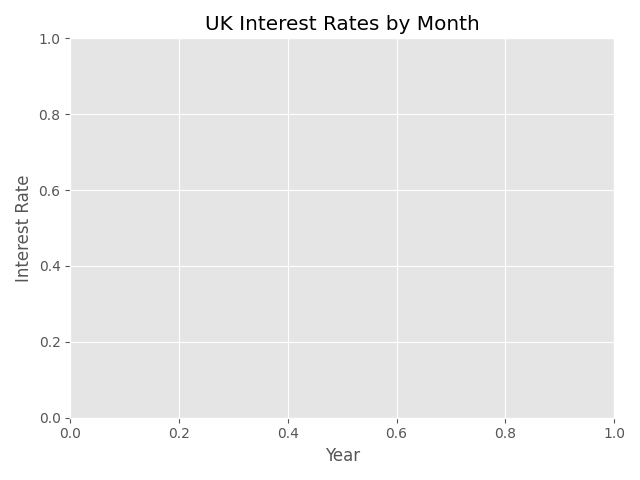

In [11]:
%matplotlib widget
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# BoE Interest rate history source - https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp
# Consumer Price Index History Annual rate source - https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23
url = "https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp"
tables_cpih = pd.read_html(url, attrs={'id': 'stats-table'})[0]
tables_cpih["Date Changed"] = pd.to_datetime(tables_cpih["Date Changed"], format="%d %b %y")

plt.style.use('ggplot')
plt.title('UK Interest Rates by Month')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.tight_layout()
x = tables_cpih["Date Changed"]
y = tables_cpih["Rate"]

fig, ax = plt.subplots()

xdata, ydata, = [], []
line, = ax.plot('Date Changed', 'Rate', data=tables_cpih)

def animate(i):
    xdata.append(x.iat[-i - 1])
    ydata.append(y.iat[-i - 1])
    line.set_data(xdata, ydata)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=251, interval=20,  cache_frame_data=False, repeat=False)

ffmpegwriter = animation.writers['ffmpeg']
video = ani.to_html5_video()

plt.close()

In [12]:
%%HTML
<video alt="interest rates" autoplay muted loop>
    <source src="animations/boeinterestrates.mp4" type="video/mp4">
</video>